# Convolution

### Wenjie Chen
### Mar. 3rd, 2019

The convolution is defined as
$$
(f*g)(t) = \int_{-\infty}^{+\infty} f(\tau)g(t - \tau) d\tau
$$

In [2]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [3]:
# define functions

def gaussian_1D(x, mu, sigma):
    '''
        A gaussian function.
        
        args:
            x : [np.array] variable, e.g. np.linspace(-10, 10, 1000)
            mu : [double] expectation value, e.g. 0.
            sigma : [double] standard deviation, e.g. 1.
        
        return:
            g(x) : [np.array] a gaussian distribution function.
            
        note:
            1. FWHM = 2\sqrt(2*\ln(2))*\sigma = 2.35482 \sigma
            2. Integral = 1
            
    '''
    g = np.exp(-0.5 * (x - mu)**2 / sigma**2) / (sigma * np.sqrt(2*np.pi))
    return g

def gaussian_1D_FWHM(x, mu, FWHM):
    '''
        A gaussian function.
        
        args:
            x : [np.array] variable, e.g. np.linspace(-10, 10, 1000)
            mu : [double] expectation value, e.g. 0.
            FWHM : [double] full width half maximum, e.g. 1.
        
        return:
            g(x) : [np.array] a gaussian distribution function.
            
        note:
            1. FWHM = 2\sqrt(2*\ln(2))*\sigma = 2.35482 \sigma
            2. Integral = 1
            
    '''
    sigma = FWHM / 2.35482
    g = np.exp(-0.5 * (x - mu)**2 / sigma**2) / (sigma * np.sqrt(2*np.pi))
    return g

In [4]:
x = np.linspace(-50, 50, 1000)

In [83]:
quad(g, -np.inf, np.inf)

(0.9999999999999938, 1.4122315097625898e-09)

In [82]:
np.convolve([0, 0, 0.5, 1, 0.5, 0, 0], [1, 1, 1, 1, 1, 1, 1], 'same')

array([1.5, 2. , 2. , 2. , 2. , 2. , 1.5])

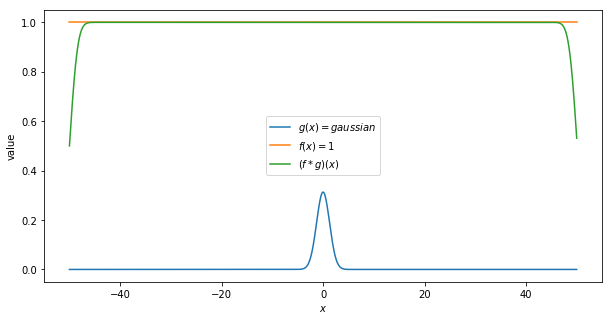

In [6]:
def g(x):
    return gaussian_1D_FWHM(x, 0, 3)

def f(x):
    return x/x

plt.figure(figsize=(10,5))
plt.plot(x, g(x))
plt.plot(x, f(x))
plt.plot(x, np.convolve(f(x), g(x), 'same') * (x[1]-x[0]))
plt.xlabel("$x$")
plt.ylabel("value")
plt.legend(["$g(x) = gaussian$", "$f(x) = 1$", "$(f*g)(x)$"])
plt.show()

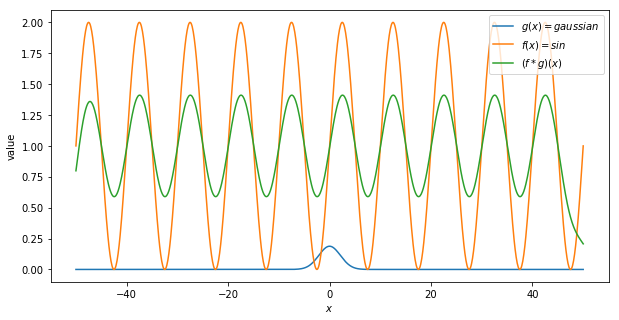

In [104]:
def g(x):
    return gaussian_1D_FWHM(x, 0, 5)

def f(x):
    return np.sin(2*np.pi/10*x) + 1

plt.figure(figsize=(10,5))
plt.plot(x, g(x))
plt.plot(x, f(x))
plt.plot(x, np.convolve(f(x), g(x), 'same') * (x[1]-x[0]))
plt.xlabel("$x$")
plt.ylabel("value")
plt.legend(["$g(x) = gaussian$", "$f(x) = sin$", "$(f*g)(x)$"])
plt.show()

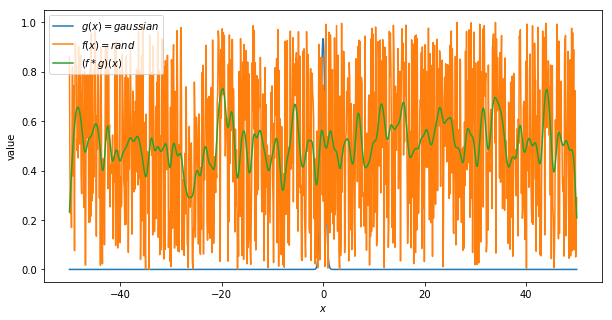

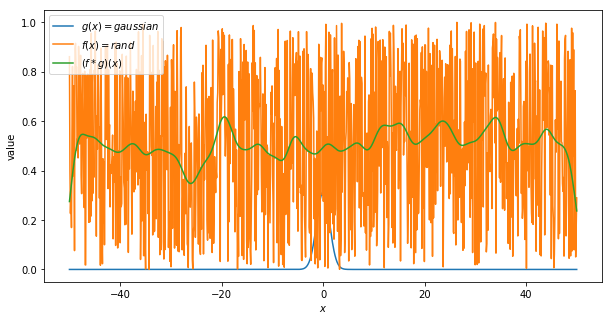

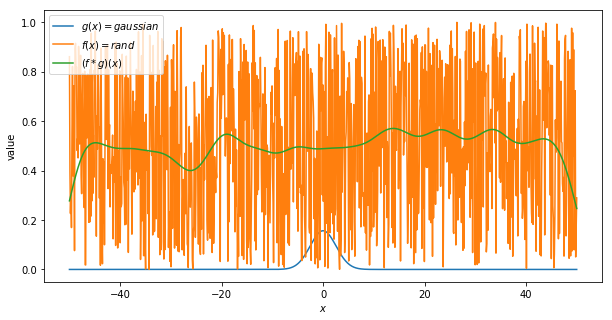

In [112]:
# The convolution between a Gaussian funcition and a random signal.
# The convolution function becomes smoother as the sigma getting larger.

f = np.random.rand(1000)

def g(x):
    return gaussian_1D_FWHM(x, 0, 1)

plt.figure(figsize=(10,5))
plt.plot(x, g(x))
plt.plot(x, f)
plt.plot(x, np.convolve(f, g(x), 'same') * (x[1]-x[0]))
plt.xlabel("$x$")
plt.ylabel("value")
plt.legend(["$g(x) = gaussian$", "$f(x) = rand$", "$(f*g)(x)$"])
plt.show()

def g(x):
    return gaussian_1D_FWHM(x, 0, 3)

plt.figure(figsize=(10,5))
plt.plot(x, g(x))
plt.plot(x, f)
plt.plot(x, np.convolve(f, g(x), 'same') * (x[1]-x[0]))
plt.xlabel("$x$")
plt.ylabel("value")
plt.legend(["$g(x) = gaussian$", "$f(x) = rand$", "$(f*g)(x)$"])
plt.show()

def g(x):
    return gaussian_1D_FWHM(x, 0, 6)

plt.figure(figsize=(10,5))
plt.plot(x, g(x))
plt.plot(x, f)
plt.plot(x, np.convolve(f, g(x), 'same') * (x[1]-x[0]))
plt.xlabel("$x$")
plt.ylabel("value")
plt.legend(["$g(x) = gaussian$", "$f(x) = rand$", "$(f*g)(x)$"])
plt.show()